In [26]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set_style('white')

In [27]:
songs = pd.read_csv("/Users/kashishsharma/Desktop/project_ds/nonbool-spotify.csv")

In [28]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 8 columns):
artist                   1066 non-null object
track                    1066 non-null object
peak_position            1066 non-null int64
peak_position_grouped    1066 non-null int64
weeks_in_charts          1066 non-null int64
spotify_id               1066 non-null object
explicit                 1066 non-null float64
spotify_popularity       1066 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 66.8+ KB


In [29]:
# from sklearn import preprocessing

# loudness = songs[['loudness']].values
# min_max_scaler = preprocessing.MinMaxScaler()
# loudness_scaled = min_max_scaler.fit_transform(loudness)
# songs['loudness'] = pd.DataFrame(loudness_scaled)

In [30]:
songs_features = songs.copy()
songs_features = songs_features.drop(['track','artist', 'spotify_id'],axis=1)

In [31]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [32]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.501251072786454)
For n_clusters = 3, silhouette score is 0.4063711060274732)
For n_clusters = 4, silhouette score is 0.36936635017975583)
For n_clusters = 5, silhouette score is 0.33180149038426354)
For n_clusters = 6, silhouette score is 0.32705620605533775)
For n_clusters = 7, silhouette score is 0.32805288081190515)
For n_clusters = 8, silhouette score is 0.32638746680656)
For n_clusters = 9, silhouette score is 0.3067122831665112)
For n_clusters = 10, silhouette score is 0.31218308068475714)
For n_clusters = 11, silhouette score is 0.29845196796588763)
For n_clusters = 12, silhouette score is 0.31393317234854246)
For n_clusters = 13, silhouette score is 0.3117658791438185)
For n_clusters = 14, silhouette score is 0.30828991782080883)


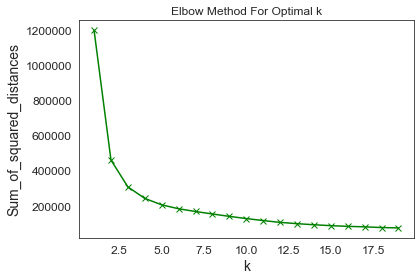

In [33]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 4)  #the optimal is at 2 but selected 4 for plotting

kmeans.fit(songs_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# PCA

In [35]:
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


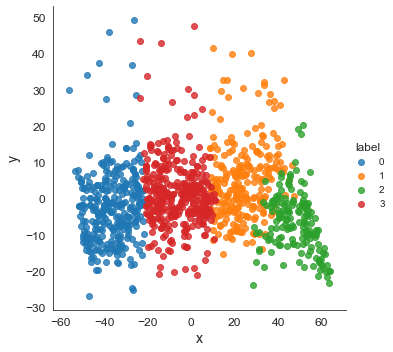

In [36]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [37]:
pca.explained_variance_ratio_

array([0.84383669, 0.09608556])

In [38]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))


      peak_position  peak_position_grouped  weeks_in_charts  explicit  \
PC-1      -0.932155              -0.184726         0.266112 -0.001750   
PC-2      -0.254486              -0.052094        -0.391097  0.003995   

      spotify_popularity  
PC-1            0.161691  
PC-2           -0.882921  


In [39]:
songs['label'] = y_kmeans
songs = songs.sample(frac=1)
songs['label'].value_counts()

3    349
0    308
1    249
2    160
Name: label, dtype: int64

In [40]:
songs[songs['label'] == 0].tail(20)

,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
883,Pusha T,The Games We Play,100,20,1,7iEoaTyBCqLaAwJnOP1BTn,1.0,61,0
991,Migos,Higher We Go (Intro),83,17,1,43dOwOq0mB4i6j4SpcSkqC,1.0,52,0
102,Moneybagg Yo,Me Vs Me,88,18,2,1lUTmmPMAsxZBR2iK9CKDF,1.0,69,0
1003,Troye Sivan,My My My!,80,16,1,4NiehSBQthimPzRsVeOgCT,0.0,73,0
52,Chloe X Halle,Do It,83,17,3,1bRjwdtScY2eMe9uMmsOkG,0.0,78,0
53,Eric Church,Stick That In Your Country Song,92,19,1,5lH14PEjAXYuMTz0Dd4L1D,0.0,65,0
782,Ariana Grande,Goodnight N Go,87,18,1,14kYOiFVPb7E7NfFbqhdln,1.0,71,0
574,Rich The Kid,Splashin,80,16,5,3KLo7ByvjCNyBrfz5DZ2mO,1.0,71,0
726,Lil Baby,Deep End,97,20,1,16QjPRt5HYK0dnLGmGRCvf,1.0,56,0
399,Kevin Gates,By My Lonely,86,18,1,25AEevSO1lu4EKMIP5Sy5p,1.0,64,0


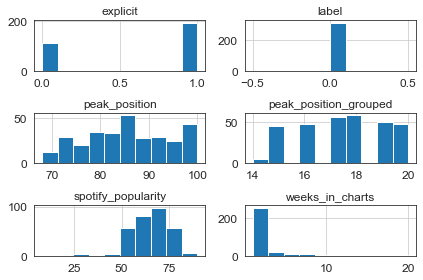

In [41]:
songs[songs['label']==0].hist()

plt.tight_layout()

In [42]:
songs[songs['label']==1].head(20)

,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
502,Drake,Omerta,35,7,2,3kCwyvhvVTyehIzYN2I0nF,1.0,62,1
900,Nicki Minaj,Barbie Tingz,25,5,4,2qsQ8eVDPmobZpvDxQCVQu,1.0,66,1
265,Eminem,Darkness,28,6,2,5SiZJoLXp3WOl3J4C8IK0d,1.0,72,1
618,Logic,Keanu Reeves,38,8,3,3PYx9Wte3jwb48V0wArMOy,1.0,73,1
715,Luke Bryan,"Sunrise, Sunburn, Sunset",35,7,16,53yTYusPQJ1AApL1hi0Dnc,0.0,70,1
415,Dan + Shay,All To Myself,31,7,20,08tq1XcHwVt5PHXUo87i0D,0.0,72,1
306,Nat King Cole,The Christmas Song (Merry Christmas To You),11,3,21,4PS1e8f2LvuTFgUs1Cn3ON,0.0,48,1
788,Travis Scott,R.I.P Screw,26,6,2,4SZepBIPDRwPaHIjAKwRDb,1.0,72,1
575,Lil Skies,I,39,8,4,4ZT9FnbFu1PaBfV3itxiqT,1.0,79,1
63,twenty one pilots,Level Of Concern,23,5,11,6xZ4Q2k2ompmDppyeESIY8,0.0,83,1


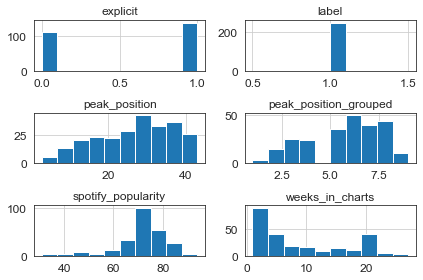

In [43]:
songs[songs['label']==1].hist()

plt.tight_layout()

In [44]:
songs[songs['label']==2].head(20)

,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
912,Avicii,Wake Me Up!,4,1,54,4h8VwCb1MTGoLKueQ1WgbD,0.0,84,2
283,Taylor Swift,Lover,10,2,22,1dGr1c8CrMLDpV6mPbImSI,0.0,80,2
771,XXXTENTACION,Changes,18,4,20,7AFASza1mXqntmGtbxXprO,0.0,84,2
534,Ariana Grande,"Thank U, Next",1,1,28,3e9HZxeyfWwjeyPAMmWSSQ,1.0,84,2
32,6ix9ine,Gooba,3,1,8,4NhDYoQTYCdWHTvlbGVgwo,1.0,92,2
509,Billie Eilish,Bury A Friend,14,3,20,4SSnFejRGlZikf02HLewEF,0.0,81,2
20,Morgan Wallen,Chasin' You,16,4,23,5MwynWK9s4hlyKHqhkNn4A,0.0,81,2
493,A Boogie Wit da Hoodie,Look Back At It,27,6,31,3Ol2xnObFdKV9pmRD2t9x8,1.0,78,2
520,Blueface,Thotiana,8,2,20,3oh6SCCeLuXhFpEyepla6G,1.0,73,2
1049,Sam Hunt,Body Like A Back Road,6,2,41,7mldq42yDuxiUNn08nvzHO,0.0,77,2


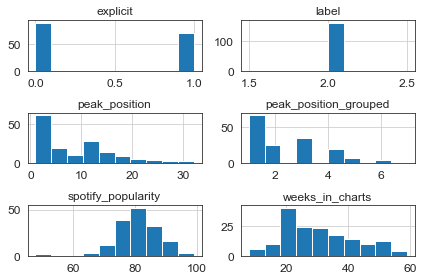

In [45]:
songs[songs['label']==2].hist()

plt.tight_layout()

In [46]:
songs[songs['label']==3].head(20)

,artist,track,peak_position,peak_position_grouped,weeks_in_charts,spotify_id,explicit,spotify_popularity,label
881,Darius Rucker,For The First Time,58,12,10,0LG2cFomCi8Fb664Lvr3Nu,0.0,63,3
358,Miranda Lambert,It All Comes Out In The Wash,70,14,2,41FLEFSeRCv19OBn0vLiaH,0.0,61,3
367,Cole Swindell,Love You Too Late,49,10,14,52MNypbTWiwybwzhXvsPk5,0.0,65,3
710,Weezer,Africa,51,11,15,3ZPKocroJIcnHGcnJVlLKD,0.0,63,3
783,Alessia Cara,Growing Pains,65,13,8,003eoIwxETJujVWmNFMoZy,0.0,55,3
904,Mason Ramsey,Famous,62,13,2,1lasE4yXQmZ5mwWdGQGn8E,0.0,55,3
677,Chris Young,Hangin' On,63,13,13,6CyJlVAEFlNdpggOLanytL,0.0,65,3
1032,Kodak Black,Transportin',46,10,16,1WIZiOuNO3woKfdlSK2gNn,1.0,70,3
591,Juice WRLD,Armed And Dangerous,44,9,17,5wujBwqG7INdStqGd4tRMX,1.0,81,3
467,YK Osiris,Worth It,48,10,25,0PQoUlzP7ILdcrzpajHXc0,0.0,73,3


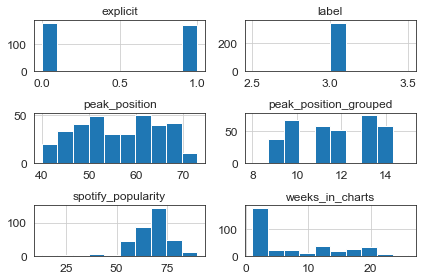

In [47]:
songs[songs['label']==3].hist()

plt.tight_layout()

In [48]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Genre Definition

In [49]:
definitions = ['Genre 1','Genre 2','Genre 3','Genre 4']

# RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

features = songs_features.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

list(zip(songs_features[features], rfc.feature_importances_))
y_pred = rfc.predict(X_test)    

In [51]:
print(classification_report(y_test,y_pred,target_names = definitions)+'forest')

              precision    recall  f1-score   support

     Genre 1       0.99      0.99      0.99       153
     Genre 2       0.96      0.98      0.97       124
     Genre 3       1.00      0.94      0.97        90
     Genre 4       0.97      0.99      0.98       166

    accuracy                           0.98       533
   macro avg       0.98      0.97      0.98       533
weighted avg       0.98      0.98      0.98       533
forest


Confusion matrix, without normalization
[[151   0   0   2]
 [  0 121   0   3]
 [  0   5  85   0]
 [  2   0   0 164]]


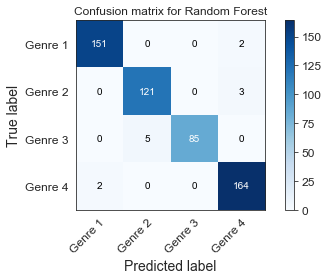

In [52]:
plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

Normalized confusion matrix
[[0.9869281  0.         0.         0.0130719 ]
 [0.         0.97580645 0.         0.02419355]
 [0.         0.05555556 0.94444444 0.        ]
 [0.01204819 0.         0.         0.98795181]]


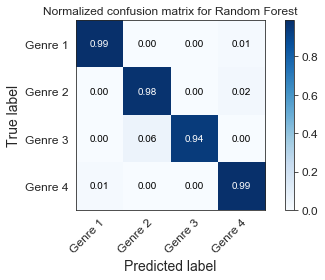

In [53]:
plot_confusion_matrix(y_test, y_pred, classes=definitions, normalize=True,
                      title='Normalized confusion matrix for Random Forest')

# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [55]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[148   0   0   5]
 [  0 122   0   2]
 [  0   6  84   0]
 [  2   1   0 163]]


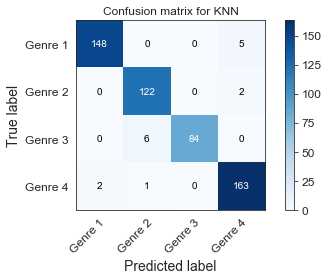

In [56]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [57]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

     Genre 1       0.99      0.97      0.98       153
     Genre 2       0.95      0.98      0.96       124
     Genre 3       1.00      0.93      0.97        90
     Genre 4       0.96      0.98      0.97       166

    accuracy                           0.97       533
   macro avg       0.97      0.97      0.97       533
weighted avg       0.97      0.97      0.97       533
KNN


Normalized confusion matrix
[[0.96732026 0.         0.         0.03267974]
 [0.         0.98387097 0.         0.01612903]
 [0.         0.06666667 0.93333333 0.        ]
 [0.01204819 0.0060241  0.         0.98192771]]


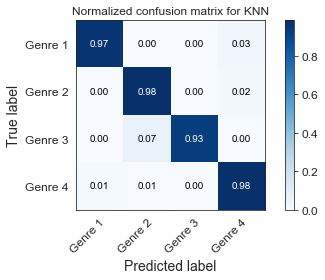

In [58]:
plot_confusion_matrix(y_test,knn_pred, classes=definitions, normalize=True,
                      title='Normalized confusion matrix for KNN')

# SVM

In [59]:
from sklearn import svm
svm = svm.SVC(kernel="linear") 
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[150   0   0   3]
 [  0 124   0   0]
 [  0   1  89   0]
 [  0   0   0 166]]


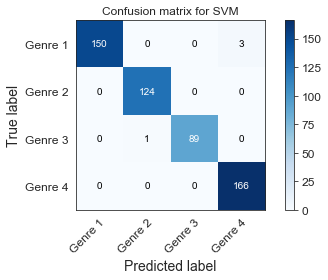

In [60]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

Normalized confusion matrix
[[0.98039216 0.         0.         0.01960784]
 [0.         1.         0.         0.        ]
 [0.         0.01111111 0.98888889 0.        ]
 [0.         0.         0.         1.        ]]


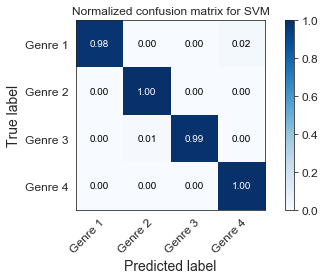

In [61]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions, normalize=True,
                      title='Normalized confusion matrix for SVM')

